In [43]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
from datetime import datetime, timedelta
import sys
sys.path.append("/scratch/uni/u237/users/tlang/PhD/flight_segmentation_hackathon/halo-flight-phase-separation/")

import FlightPhaseTools as fpt
from ResearchFlight import ResearchFlight
from ResearchFlightSegment import ResearchFlightSegment
from importlib import reload

# Load data into xarray datasets using typhon FileSet objects.

In [44]:
bahamas = xr.open_dataset('/scratch/uni/u237/users/tlang/PhD/flight_segmentation_hackathon/data/bahamas_20200128_v0.4.nc')
dropsondes = xr.open_dataset('/scratch/uni/u237/users/tlang/PhD/flight_segmentation_hackathon/data/dropsondes_20200128_v0.4.nc')

# Determine the timestamps of the different flight phases using the FlightPhaseTools module.

In [55]:
reload(fpt)

takeoff = 0
touchdown = len(bahamas['time']) - 1

#enter_c1 = fpt.ds_timestamp_ind(bahamas, dropsondes, 0)
#exit_c1 = fpt.ds_timestamp_ind(bahamas, dropsondes, 11)
enter_c1_ds = fpt.ds_timestamp_ind(bahamas, dropsondes, 0)
enter_c1 = fpt.timestamp_ind_1min_prior(bahamas, enter_c1_ds)
exit_c1 = fpt.exit_circle_timestamp_ind(bahamas, enter_c1) - 1

#enter_c2 = fpt.ds_timestamp_ind(bahamas, dropsondes, 12)
#exit_c2 = fpt.ds_timestamp_ind(bahamas, dropsondes, 23)
enter_c2_ds = fpt.ds_timestamp_ind(bahamas, dropsondes, 12)
enter_c2 = fpt.timestamp_ind_1min_prior(bahamas, enter_c2_ds)
exit_c2 = fpt.exit_circle_timestamp_ind(bahamas, enter_c2) - 2

#enter_c3 = fpt.ds_timestamp_ind(bahamas, dropsondes, 24)
#exit_c3 = fpt.ds_timestamp_ind(bahamas, dropsondes, 34)
enter_c3_ds = fpt.ds_timestamp_ind(bahamas, dropsondes, 24)
#irregularity: Start circle3 4 minutes before first dropsonde, so that it can be a full 360° circle
enter_c3 = int(np.argmin(np.abs(bahamas['time'] - (bahamas['time'][enter_c3_ds] - np.timedelta64(4, 'm')))))
exit_c3 = fpt.exit_circle_timestamp_ind(bahamas, enter_c3) - 1

enter_circling1 = enter_c1
exit_circling1 = exit_c3

max_roll_b4_leg1 = fpt.max_timestamp_ind(bahamas, 'roll', 
          slice('2020-01-28T18:30:00', '2020-01-28T19:00:00'),
          order=1000
                                        )
enter_leg1 = fpt.find_first_value_after_ts_ind(bahamas, 'roll', max_roll_b4_leg1, 0., 0.05) - 45
max_roll_after_leg1 = fpt.max_timestamp_ind(bahamas, 'roll', 
          slice('2020-01-28T19:00:00', '2020-01-28T19:20:00'),
          order=500
         )
exit_leg1 = fpt.find_first_value_before_ts_ind(bahamas, 'roll', max_roll_after_leg1, 0., 0.05)

min_roll_b4_rad_cal = fpt.min_timestamp_ind(bahamas, 'roll', 
          slice('2020-01-28T19:00:00', '2020-01-28T19:20:00'),
          order=500
         )
enter_rad_cal = fpt.find_first_value_after_ts_ind(bahamas, 'heading', min_roll_b4_rad_cal, 0., 1.0)
max_roll_after_rad_cal = fpt.max_timestamp_ind(bahamas, 'roll', 
          slice('2020-01-28T19:15:00', '2020-01-28T19:30:00'),
          order=500
         )
exit_rad_cal = fpt.find_first_value_before_ts_ind(bahamas, 'roll', max_roll_after_rad_cal, -10., 0.1)

max_roll_b4_leg2 = fpt.max_timestamp_ind(bahamas, 'roll', 
          slice('2020-01-28T19:10:00', '2020-01-28T19:30:00'),
          order=1000
                                   )
enter_leg2 = fpt.find_first_value_after_ts_ind(bahamas, 'roll', max_roll_b4_leg2, 0., 0.05) - 60
max_roll_after_leg2 = fpt.max_timestamp_ind(bahamas, 'roll', 
                                       slice('2020-01-28T19:30:00', '2020-01-28T20:00:00'),
                                       order=1000
                                      )
exit_leg2 = fpt.find_first_value_before_ts_ind(bahamas, 'roll', max_roll_after_leg2, 0., 0.05)

#enter_c4 = fpt.ds_timestamp_ind(bahamas, dropsondes, 35)
#exit_c4 = fpt.ds_timestamp_ind(bahamas, dropsondes, 45)
enter_c4_ds = fpt.ds_timestamp_ind(bahamas, dropsondes, 35)
enter_c4 = fpt.timestamp_ind_1min_prior(bahamas, enter_c4_ds)
exit_c4 = fpt.exit_circle_timestamp_ind(bahamas, enter_c4) - 4

#enter_c5 = fpt.ds_timestamp_ind(bahamas, dropsondes, 46)
#exit_c5 = fpt.ds_timestamp_ind(bahamas, dropsondes, 57)
enter_c5_ds = fpt.ds_timestamp_ind(bahamas, dropsondes, 46)
enter_c5 = fpt.timestamp_ind_1min_prior(bahamas, enter_c5_ds)
exit_c5 = fpt.exit_circle_timestamp_ind(bahamas, enter_c5) + 4

#enter_c6 = fpt.ds_timestamp_ind(bahamas, dropsondes, 58)
#exit_c6 = fpt.ds_timestamp_ind(bahamas, dropsondes, 69)
enter_c6_ds = fpt.ds_timestamp_ind(bahamas, dropsondes, 58)
#irregularity: Start circle6 5 minutes before first dropsonde, so that it can be a full 360° circle
enter_c6 = int(np.argmin(np.abs(bahamas['time'] - (bahamas['time'][enter_c6_ds] - np.timedelta64(5, 'm')))))
exit_c6 = fpt.exit_circle_timestamp_ind(bahamas, enter_c6) + 1

enter_circling2 = enter_c4
exit_circling2 = exit_c6

bahamas["altitude_dt"] = (['time'], np.append(np.diff(bahamas["altitude"]),0))
min_dzdt_after_c6 = fpt.min_timestamp_ind(bahamas, 'altitude_dt', 
                      slice('2020-01-28T23:20:00', '2020-01-28T23:40:00'), order=1000)
enter_lidar_cal = fpt.find_first_value_after_ts_ind(bahamas, 'altitude_dt', min_dzdt_after_c6, 0., 0.05)
min_dzdt_after_lidar_cal = fpt.min_timestamp_ind(bahamas, 'altitude_dt', 
                      slice('2020-01-28T23:40:00', '2020-01-28T23:55:00'), order=1000)
exit_lidar_cal = fpt.find_first_value_before_ts_ind(bahamas, 'altitude_dt', min_dzdt_after_lidar_cal, 0., 0.05)


ts_ind_list = [takeoff, touchdown, enter_circling1, exit_circling1,
               enter_circling2, exit_circling2, enter_c1, exit_c1, enter_c2, 
               exit_c2, enter_c3, exit_c3, enter_leg1, 
               exit_leg1, enter_rad_cal, exit_rad_cal, 
               enter_leg2, exit_leg2, enter_c4, exit_c4, 
               enter_c5, exit_c5, enter_c6, exit_c6, enter_lidar_cal,
               exit_lidar_cal,
               ]
label_list = ["takeoff", "touchdown", "enter_circling1", "exit_circling1",
              "enter_circling2", "exit_circling2", "enter_c1", "exit_c1", 
              "enter_c2", "exit_c2", "enter_c3", "exit_c3", 
              "enter_leg1", "exit_leg1", "enter_rad_cal", 
              "exit_rad_cal", "enter_leg2", "exit_leg2", 
              "enter_c4", "exit_c4", "enter_c5", "exit_c5", 
              "enter_c6", "exit_c6", "enter_lidar_cal", 
              "exit_lidar_cal"]

# Create basic timeseries of bahamas data with markers for determined timestamps to manually evaluate the validity of the timestamps.

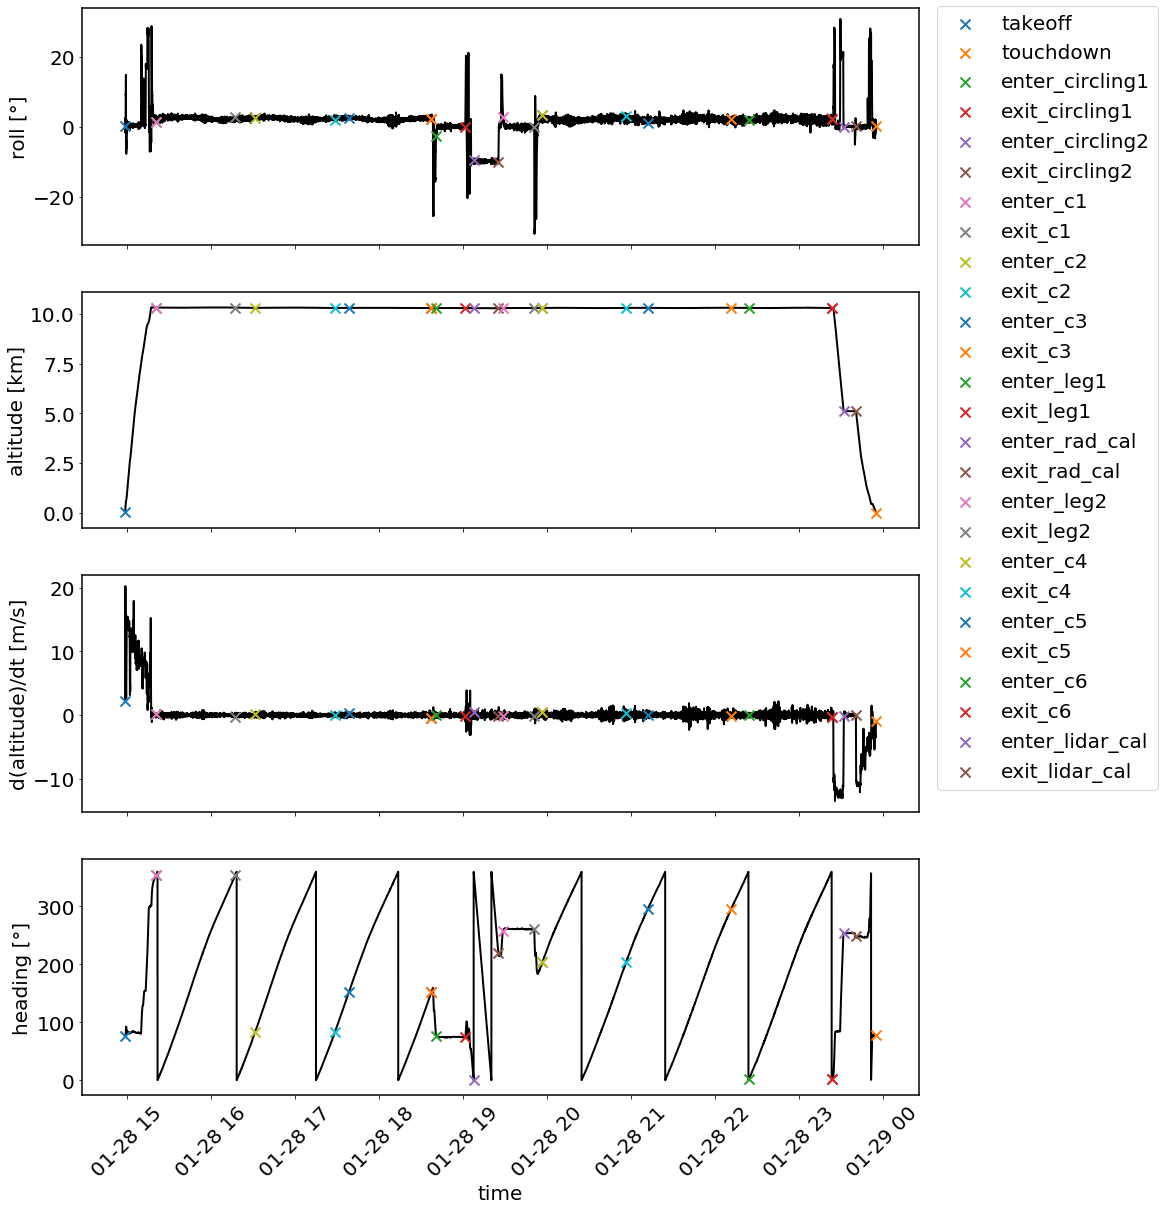

In [56]:
%matplotlib inline
fig, ax = fpt.plot_bahamas_timeseries(bahamas, ts_ind_list, label_list)

# Create a ResearchFlight object to represent the flight meta data.

In [49]:
RF05 = ResearchFlight(name=f"RF{bahamas.attrs['flight_number']}",
                      mission=bahamas.attrs['mission'],
                      flight_id='HALO-0128',
                      contacts=[
                          {
                              'name': 'Marc Prange', 
                              'email': 'marc.prange@uni-hamburg.de',
                              'tags': ['lc', 'dp'],
                          },
                          {
                              'name': 'Bjorn Stevens',
                              'email': 'bjorn.stevens@mpimet.mpg.de',
                              'tags': ['pi']
                          },
                          {
                              'name': 'Theresa Lang', 
                              'email': 'theresa.lang@uni-hamburg.de',
                              'tags': ['dp'],
                          }
                      ],
                      date=fpt.dt64_to_dt(bahamas['time'][takeoff].values).date(),
                      flight_report='https://observations.ipsl.fr/aeris/eurec4a-data/REPORTS/HALO/2020/20200128/HALO-0128.pdf',
                      takeoff=fpt.dt64_to_dt(bahamas['time'][takeoff].values),
                      landing=fpt.dt64_to_dt(bahamas['time'][touchdown].values),
                      events=[],
                      remarks=['Rather long excursion towards NTAS with radar calibration maneuver.',
                               'Sugar cloud patterns within the circle.'],
)

# Store the flight phase information in ResearchFlightSegment objects.

In [50]:
#Todo: add segment_id
circling1 = ResearchFlightSegment(kinds=['circling'],
                            name='Circling 1',
                            segment_id=f'{RF05.flight_id}_o1',
                            start=fpt.dt64_to_dt(bahamas["time"][enter_circling1].values),
                            end=fpt.dt64_to_dt(bahamas['time'][exit_circling1].values),
                            good_dropsondes=35,
                            irregularities=[]
                           )

circling2 = ResearchFlightSegment(kinds=['circling'],
                            name='Circling 2',
                            segment_id=f'{RF05.flight_id}_o2',
                            start=fpt.dt64_to_dt(bahamas["time"][enter_circling2].values),
                            end=fpt.dt64_to_dt(bahamas['time'][exit_circling2].values),
                            good_dropsondes=36,
                            irregularities=[]
                           )

circle1 = ResearchFlightSegment(kinds=['circle'],
                                name='Circle 1',
                                segment_id=f'{RF05.flight_id}_c1',
                                start=fpt.dt64_to_dt(bahamas["time"][enter_c1].values),
                                end=fpt.dt64_to_dt(bahamas['time'][exit_c1].values),
                                irregularities=[],
                                good_dropsondes=12
                               )
circle_break1 = ResearchFlightSegment(kinds=['circle_break'],
                                      name='Break between circle 1 and circle 2',
                                      segment_id=f'{RF05.flight_id}_cb1',
                                      start=fpt.dt64_to_dt(bahamas["time"][exit_c1].values),
                                      end=fpt.dt64_to_dt(bahamas['time'][enter_c2].values),
                                      irregularities=[]
                                     )
circle2 = ResearchFlightSegment(kinds=['circle'],
                                name='Circle 2',
                                segment_id=f'{RF05.flight_id}_c2',
                                start=fpt.dt64_to_dt(bahamas["time"][enter_c2].values),
                                end=fpt.dt64_to_dt(bahamas['time'][exit_c2].values),
                                irregularities=[],
                                good_dropsondes=12
                               )
circle_break2 = ResearchFlightSegment(kinds=['circle_break'],
                                      name='Break between circle 2 and circle 3',
                                      segment_id=f'{RF05.flight_id}_cb2',
                                      start=fpt.dt64_to_dt(bahamas["time"][exit_c2].values),
                                      end=fpt.dt64_to_dt(bahamas['time'][enter_c3].values),
                                      irregularities=[]
                                     )
circle3 = ResearchFlightSegment(kinds=['circle'],
                                name='Circle 3',
                                segment_id=f'{RF05.flight_id}_c3',
                                start=fpt.dt64_to_dt(bahamas["time"][enter_c3].values),
                                end=fpt.dt64_to_dt(bahamas['time'][exit_c3].values),
                                irregularities=['Circle starts 4 minutes (instead of regularly 1 minute) before the first dropsonde.'],
                                good_dropsondes=11
                               )
leg1 = ResearchFlightSegment(kinds=['straight_leg'],
                             name='Outbound leg towards NTAS',
                             segment_id=f'{RF05.flight_id}_sl1',
                             start=fpt.dt64_to_dt(bahamas["time"][enter_leg1].values),
                             end=fpt.dt64_to_dt(bahamas['time'][exit_leg1].values),
                             irregularities=[]
                            )
radar_cal = ResearchFlightSegment(kinds=['radar_calibration_tilted'],
                                  name='Radar calibration constant bank',
                                  segment_id=f'{RF05.flight_id}_rct1',
                                  start=fpt.dt64_to_dt(bahamas["time"][enter_rad_cal].values),
                                  end=fpt.dt64_to_dt(bahamas['time'][exit_rad_cal].values),
                                  irregularities=[]
                                 )
leg2 = ResearchFlightSegment(kinds=['straight_leg'],
                             name='Inbound leg from NTAS',
                             segment_id=f'{RF05.flight_id}_sl2',
                             start=fpt.dt64_to_dt(bahamas["time"][enter_leg2].values),
                             end=fpt.dt64_to_dt(bahamas['time'][exit_leg2].values),
                            irregularities=[]
                            )
circle4 = ResearchFlightSegment(kinds=['circle'],
                                name='Circle 4',
                                segment_id=f'{RF05.flight_id}_c4',
                                start=fpt.dt64_to_dt(bahamas["time"][enter_c4].values),
                                end=fpt.dt64_to_dt(bahamas['time'][exit_c4].values),
                                irregularities=[],
                                good_dropsondes=11
                               )
circle_break3 = ResearchFlightSegment(kinds=['circle_break'],
                                      name='Break between circle 4 and circle 5',
                                      segment_id=f'{RF05.flight_id}_cb3',
                                      start=fpt.dt64_to_dt(bahamas["time"][exit_c4].values),
                                      end=fpt.dt64_to_dt(bahamas['time'][enter_c5].values),
                                      irregularities=[]
                                     )
circle5 = ResearchFlightSegment(kinds=['circle'],
                                name='Circle 5',
                                segment_id=f'{RF05.flight_id}_c5',
                                start=fpt.dt64_to_dt(bahamas["time"][enter_c5].values),
                                end=fpt.dt64_to_dt(bahamas['time'][exit_c5].values),
                                irregularities=[],
                                good_dropsondes=12
                               )
circle_break4 = ResearchFlightSegment(kinds=['circle_break'],
                                      name='Break between circle 4 and circle 5',
                                      segment_id=f'{RF05.flight_id}_cb4',
                                      start=fpt.dt64_to_dt(bahamas["time"][exit_c5].values),
                                      end=fpt.dt64_to_dt(bahamas['time'][enter_c6].values),
                                      irregularities=[]
                                     )
circle6 = ResearchFlightSegment(kinds=['circle'],
                                name='Circle 6',
                                segment_id=f'{RF05.flight_id}_c6',
                                start=fpt.dt64_to_dt(bahamas["time"][enter_c6].values),
                                end=fpt.dt64_to_dt(bahamas['time'][exit_c6].values),
                                irregularities=['Circle starts 5 minutes (instead of regularly 1 minute) before the first dropsonde.', 'There are 13 dropsondes in this circle. The last two sondes were launched one after another, to check variability from measurement.'],
                                good_dropsondes=13
                               )
lidar_leg = ResearchFlightSegment(kinds=['lidar_leg'],
                                  name='Lidar leg',
                                  segment_id=f'{RF05.flight_id}_ll1',
                                  start=fpt.dt64_to_dt(bahamas["time"][enter_lidar_cal].values),
                                  end=fpt.dt64_to_dt(bahamas['time'][exit_lidar_cal].values),
                                  irregularities=[]
                                 )

# Append the flight segments to the ResearchFlight object and save the object content to a .yaml file.

In [51]:
RF05.to_dictionary()

{'name': 'RF05',
 'mission': 'EUREC4A',
 'flight_id': 'HALO-0128',
 'contacts': [{'name': 'Marc Prange',
   'email': 'marc.prange@uni-hamburg.de',
   'tags': ['lc', 'dp']},
  {'name': 'Bjorn Stevens',
   'email': 'bjorn.stevens@mpimet.mpg.de',
   'tags': ['pi']},
  {'name': 'Theresa Lang',
   'email': 'theresa.lang@uni-hamburg.de',
   'tags': ['dp']}],
 'date': datetime.date(2020, 1, 28),
 'flight_report': 'https://observations.ipsl.fr/aeris/eurec4a-data/REPORTS/HALO/2020/20200128/HALO-0128.pdf',
 'takeoff': datetime.datetime(2020, 1, 28, 14, 58, 34),
 'landing': datetime.datetime(2020, 1, 28, 23, 55, 17),
 'events': [],
 'remarks': ['Rather long excursion towards NTAS with radar calibration maneuver.',
  'Sugar cloud patterns within the circle.'],
 'segments': []}

In [52]:
RF05.append_segments([circle1, circle_break1, circle2, circle_break2, circle3, circling1,
                      leg1, radar_cal, leg2, circle4, circle_break3, circle5, circle_break4,
                      circle6, circling2, lidar_leg])

In [53]:
RF05.to_yaml(filename='../flight_phase_files/HALO_RF05_20200128_info.yaml')